# Problem 1

The lsgd functions below return x (for autograder) and d, an array of the errors as k progresses.

In [222]:
using Plots

In [3]:
function lsgd(A, b, mu, x0, nIters)
#
# Syntax: x = lsgd(A, b, mu, x0, nIters)
#
# Inputs: A is an m x n matrix
# b is a vector of length m
# mu is the step size to use, and must satisfy
# 0 < mu < 2 / norm(A)^2 to guarantee convergence
# x0 is the initial starting vector (of length n) to use
# nIters is the number of iterations to perform
#
# Outputs: x is a vector of length n containing the approximate solution
#
# Description: Performs gradient descent to solve the least squares problem
#
# \min x \|b - A x\|_2
#

    
    b  =  vec(b)
    x0  =  vec(x0)
    
    x  =  x0
    for k in 1:nIters
        x  -=  mu*(A'*(A*x-b))
    end
    
    return x 
end

lsgd (generic function with 1 method)

In [370]:
function lsgd(A, b, mu, x0, nIters)
#
# Syntax: x = lsgd(A, b, mu, x0, nIters)
#
# Inputs: A is an m x n matrix
# b is a vector of length m
# mu is the step size to use, and must satisfy
# 0 < mu < 2 / norm(A)^2 to guarantee convergence
# x0 is the initial starting vector (of length n) to use
# nIters is the number of iterations to perform
#
# Outputs: x is a vector of length n containing the approximate solution
#
# Description: Performs gradient descent to solve the least squares problem
#
# \min x \|b - A x\|_2
#

    
    b  =  vec(b)
    x0  =  vec(x0)
    
    d=zeros(nIters)
    x  =  x0
    for k in 1:nIters
        x  -=  mu*(A'*(A*x-b))
        d[k] = norm(x-pinv(A)*b)#xtrue)
    end
    
    return d 
end

lsgd (generic function with 2 methods)

In [397]:
nIters = 800
m = 100; n = 50;
A = randn(m, n); xtrue = rand(n);

sigma = 0.1;
b = A * xtrue + sigma * randn(m);
mu = 1/svdvals(A)[1]^2;
x0 = zeros(n);

yline_01 = lsgd(A,b,mu,x0,nIters,xtrue);
xline = 0:length(yline_01)-1;


sigma = 0.5;
b = A * xtrue + sigma * randn(m);
mu = 1/svdvals(A)[1]^2;
x0 = zeros(n);

yline_05 = lsgd(A,b,mu,x0,nIters);
xline = 0:length(yline_05)-1;


sigma = 1;
b = A * xtrue + sigma * randn(m);
mu = 1/svdvals(A)[1]^2;
x0 = zeros(n);

yline_1 = lsgd(A,b,mu,x0,nIters);
xline = 0:length(yline_1)-1;


sigma = 2;
b = A * xtrue + sigma * randn(m);
mu = 1/svdvals(A)[1]^2;
x0 = zeros(n);

yline_2 = lsgd(A,b,mu,x0,nIters);
xline = 0:length(yline_2)-1;


<br>
<br>

Based on the two plots below (in log and normal scale), we can see that $$\Vert x_{ls} - s_k\vert$$ decreases monotonically. The Gradient Descent algorithm seems to perform better for lower values of $\sigma$. However, the algorithm has relatively similar performance for different values of $\sigma$. 

<br>


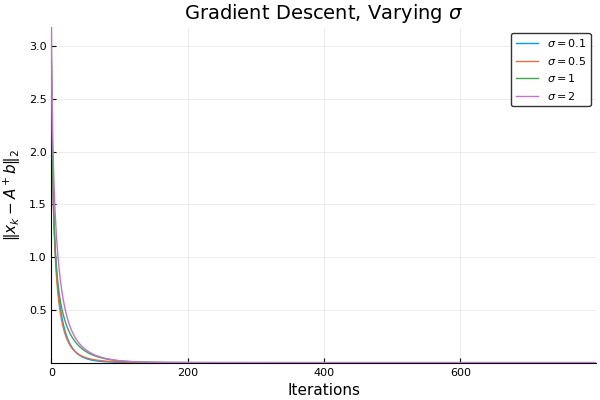

In [393]:
plot(xline, [yline_01 yline_05 yline_1 yline_2], label=[L"$\sigma = 0.1$" L"$\sigma = 0.5$" L"$\sigma = 1$" L"$\sigma = 2$"], 
    xlabel = "Iterations", ylabel = L"$\Vert x_k-A^+b \Vert_2$", title = L"Gradient Descent, Varying $\sigma$")



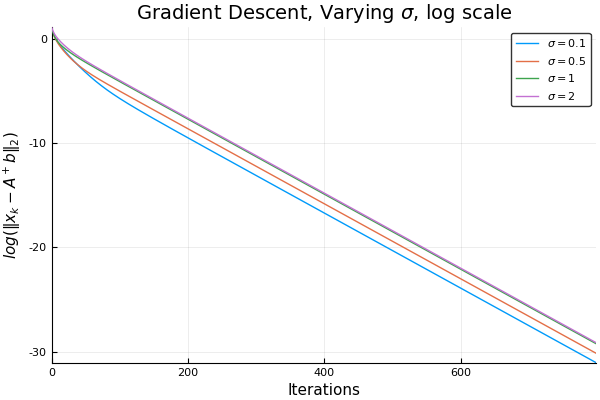

In [394]:
plot(xline, log.([yline_01 yline_05 yline_1 yline_2]), 
    label=[L"$\sigma = 0.1$" L"$\sigma = 0.5$" L"$\sigma = 1$" L"$\sigma = 2$"], 
    xlabel = "Iterations", ylabel = L"$log(\Vert x_k-A^+b \Vert_2)$", title = L"Gradient Descent, Varying $\sigma$, log scale" )


<br>
<br>
<br>

# Problem 2
The lsgdn functions below return x (for autograder) and d, an array of the errors as k progresses.
<br>
<br>


In [350]:
function lsngd(A, b, mu, x0, nIters)
#
# Syntax: x = lsngd(A, b, mu, x0, nIters)
#
# Inputs: A is an m x n matrix
# b is a vector of length m
# mu is the step size to use, and must satisfy
# 0 < mu < 1 / norm(A)^2 to guarantee convergence
# x0 is the initial starting vector (of length n) to use
# nIters is the number of iterations to perform
#
# Outputs: x is a vector of length n containing the approximate solution
#
# Description: Performs Nesterov-accelerated gradient descent to solve
# the least squares problem
# \min x \|b - A x\|_2
#
    b  =  vec(b)
    x0  =  vec(x0)

    
    t  =  0
    xLast  =  x0
    x  =  x0
    
    for k =  1:nIters
        
        tLast  =  t
        t  =  0.5 * (1  +  sqrt(1  +  4 * t^2))
        z  =  x  +  ((tLast  -  1)  /  t)*(x  -  xLast)
        
        xLast  =  x
        x  =  z  -  mu*(A'*(A*z-b))
        
    end
    
    return x
end
    
    

lsngd (generic function with 1 method)

In [351]:
function lsngd(A, b, mu, x0, nIters)
#
# Syntax: x = lsngd(A, b, mu, x0, nIters)
#
# Inputs: A is an m x n matrix
# b is a vector of length m
# mu is the step size to use, and must satisfy
# 0 < mu < 1 / norm(A)^2 to guarantee convergence
# x0 is the initial starting vector (of length n) to use
# nIters is the number of iterations to perform
#
# Outputs: x is a vector of length n containing the approximate solution
#
# Description: Performs Nesterov-accelerated gradient descent to solve
# the least squares problem
# \min x \|b - A x\|_2
#
    b  =  vec(b)
    x0  =  vec(x0)

    
    t  =  0
    xLast  =  x0
    x  =  x0
    d=zeros(nIters)
    for k =  1:nIters
        
        tLast  =  t
        t  =  0.5 * (1  +  sqrt(1  +  4 * t^2))
        z  =  x  +  ((tLast  -  1)  /  t)*(x  -  xLast)
        
        xLast  =  x
        x  =  z  -  mu*(A'*(A*z-b))
        d[k] = norm(x-pinv(A)*b)#xtrue)
    end
    
    return d
end
    

lsngd (generic function with 1 method)

In [352]:
nIters = 800
m = 100; n = 50;
A = randn(m, n); xtrue = rand(n);

sigma = 0.1;
b = A * xtrue + sigma * randn(m);
mu = 1/svdvals(A)[1]^2;
x0 = zeros(n);

yline_n01 = lsngd(A,b,mu,x0,nIters);
xline = 0:length(yline_01)-1;


sigma = 0.5;
b = A * xtrue + sigma * randn(m);
mu = 1/svdvals(A)[1]^2;
x0 = zeros(n);

yline_n05 = lsngd(A,b,mu,x0,nIters);
xline = 0:length(yline_05)-1;


sigma = 1;
b = A * xtrue + sigma * randn(m);
mu = 1/svdvals(A)[1]^2;
x0 = zeros(n);

yline_n1 = lsngd(A,b,mu,x0,nIters);
xline = 0:length(yline_1)-1;


sigma = 2;
b = A * xtrue + sigma * randn(m);
mu = 1/svdvals(A)[1]^2;
x0 = zeros(n);

yline_n2 = lsngd(A,b,mu,x0,nIters);
xline = 0:length(yline_2)-1;


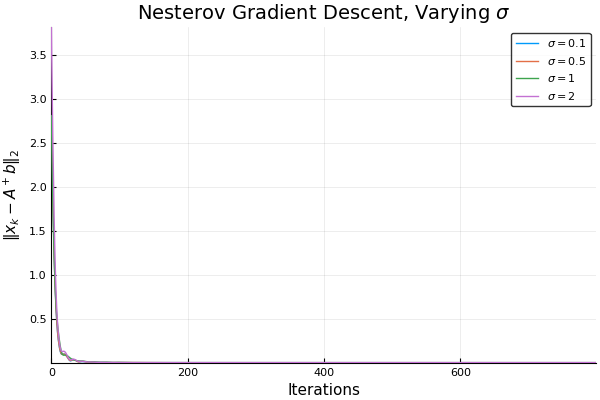

In [395]:
plot(xline, [yline_n01 yline_n05 yline_n1 yline_n2], label=[L"$\sigma = 0.1$" L"$\sigma = 0.5$" L"$\sigma = 1$" L"$\sigma = 2$"], 
    xlabel = "Iterations", ylabel = L"$\Vert x_k-A^+b \Vert_2$", title = L"Nesterov Gradient Descent, Varying $\sigma$")


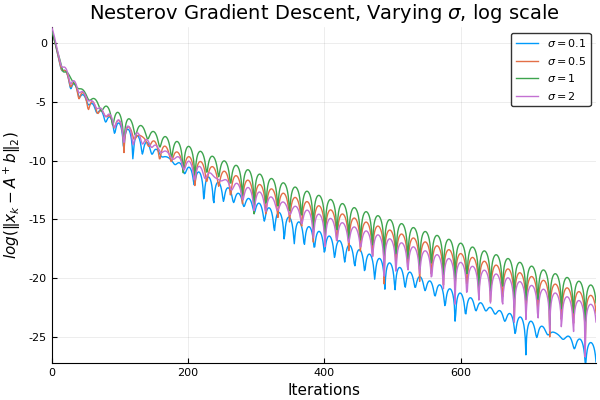

In [396]:
plot(xline, log.([yline_n01 yline_n05 yline_n1 yline_n2]), 
    label=[L"$\sigma = 0.1$" L"$\sigma = 0.5$" L"$\sigma = 1$" L"$\sigma = 2$"], 
    xlabel = "Iterations", ylabel = L"$log(\Vert x_k-A^+b \Vert_2)$", title = L"Nesterov Gradient Descent, Varying $\sigma$, log scale" )

## $\mu$ changes

In [390]:
nIters = 800
m = 100; n = 50;
A = randn(m, n); xtrue = rand(n);

sigma = 0.1;
b = A * xtrue + sigma * randn(m);
mu = 0.5/svdvals(A)[1]^2;
x0 = zeros(n);

yline_nm05 = lsngd(A,b,mu,x0,nIters);
xline = 0:length(yline_01)-1;


b = A * xtrue + sigma * randn(m);
mu = 0.75/svdvals(A)[1]^2;
x0 = zeros(n);

yline_nm075 = lsngd(A,b,mu,x0,nIters);
xline = 0:length(yline_05)-1;


b = A * xtrue + sigma * randn(m);
mu = 1/svdvals(A)[1]^2;
x0 = zeros(n);

yline_nm1 = lsngd(A,b,mu,x0,nIters);
xline = 0:length(yline_1)-1;


b = A * xtrue + sigma * randn(m);
mu = 1.25/svdvals(A)[1]^2;
x0 = zeros(n);

yline_nm125 = lsngd(A,b,mu,x0,nIters);
xline = 0:length(yline_2)-1;



### normal


m = 100; n = 50;
A = randn(m, n); xtrue = rand(n);

sigma = 0.1;
b = A * xtrue + sigma * randn(m);
mu = 0.5/svdvals(A)[1]^2;
x0 = zeros(n);

yline_m05 = lsgd(A,b,mu,x0,nIters);
xline = 0:length(yline_01)-1;


b = A * xtrue + sigma * randn(m);
mu = 0.75/svdvals(A)[1]^2;
x0 = zeros(n);

yline_m075 = lsgd(A,b,mu,x0,nIters);
xline = 0:length(yline_05)-1;


b = A * xtrue + sigma * randn(m);
mu = 1/svdvals(A)[1]^2;
x0 = zeros(n);

yline_m1 = lsgd(A,b,mu,x0,nIters);
xline = 0:length(yline_1)-1;


b = A * xtrue + sigma * randn(m);
mu = 1.25/svdvals(A)[1]^2;
x0 = zeros(n);

yline_m125 = lsgd(A,b,mu,x0,nIters);
xline = 0:length(yline_2)-1;


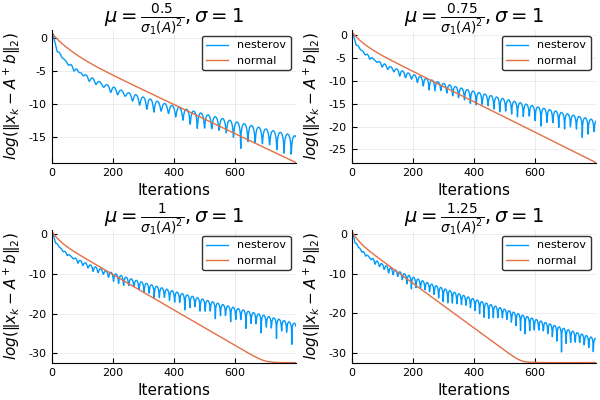

In [392]:
p1 = plot(xline, log.([yline_nm05 yline_m05]), label=[ "nesterov" "normal"], 
    xlabel = "Iterations", ylabel = L"$log(\Vert x_k-A^+b \Vert_2)$", title = L"$\mu = \frac{0.5}{\sigma_1(A)^2}, \sigma = 1$")

p2 = plot(xline, log.([yline_nm075 yline_m075]), label=[ "nesterov" "normal"], 
    xlabel = "Iterations", ylabel = L"$log(\Vert x_k-A^+b \Vert_2)$", title = L"$\mu = \frac{0.75}{\sigma_1(A)^2}, \sigma = 1$")

p3 = plot(xline, log.([yline_nm1 yline_m1]), label=[ "nesterov" "normal"], 
    xlabel = "Iterations", ylabel = L"$log(\Vert x_k-A^+b \Vert_2)$", title = L"$\mu = \frac{1}{\sigma_1(A)^2}, \sigma = 1$")

p4 = plot(xline, log.([yline_nm125 yline_m125]), label=[ "nesterov" "normal"], 
    xlabel = "Iterations", ylabel = L"$log(\Vert x_k-A^+b \Vert_2)$", title = L"$\mu = \frac{1.25}{\sigma_1(A)^2}, \sigma = 1$")
plot(p1,p2,p3,p4)